# GOOGLE Play

In [593]:
import pandas as pd
df = pd.read_csv("Data_sets/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. Just pip install missingno to get started.

<Axes: >

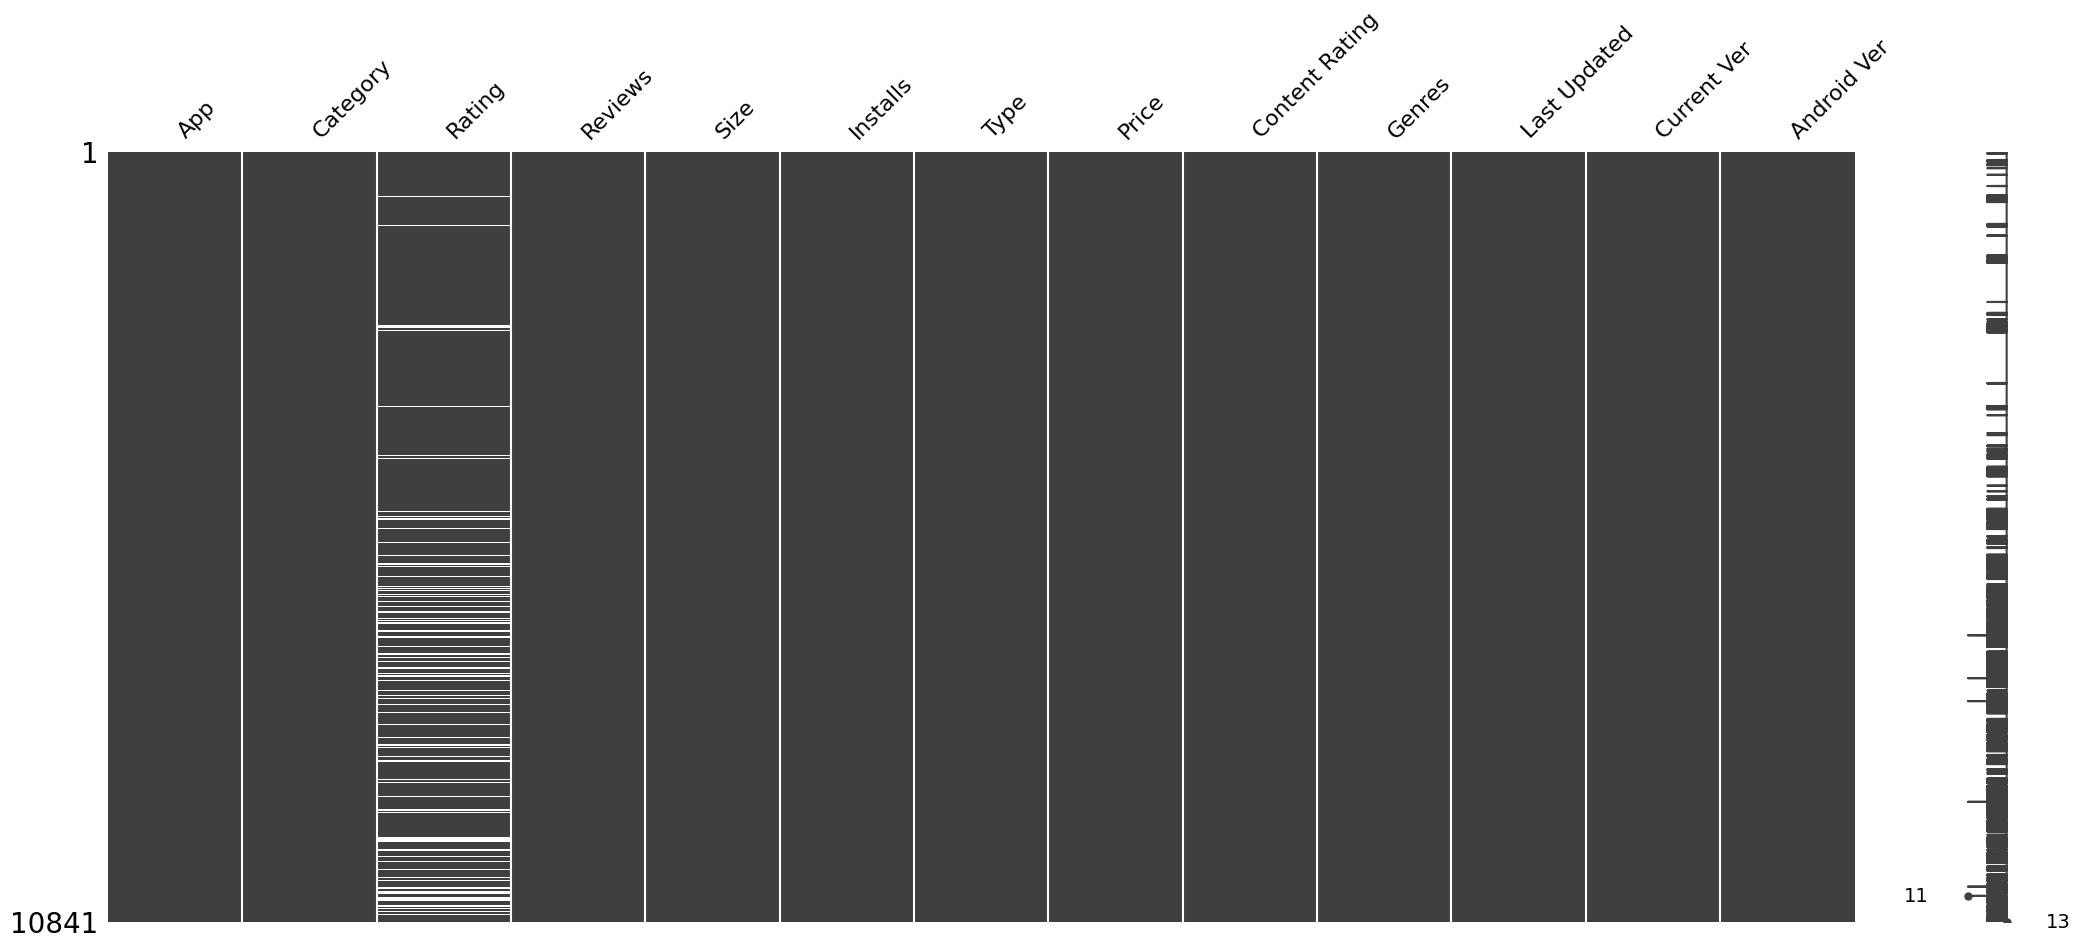

In [595]:
import missingno as msno
msno.matrix(df)

### Using missingno to visualize which columns have missig or NULL values

In [596]:
df.isna().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Size                 0
Reviews              0
Category             0
App                  0
Price                0
Installs             0
Last Updated         0
Genres               0
dtype: int64

## 2. Clean the `Rating` column and the other columns containing null values

This is a 3-part activity:

- Remove the invalid values from `Rating` (if any). Just set them as `NaN`.
- Fill the null values in the `Rating` column using the `mean()`.
- Clean any other non-numerical columns by just dropping the values.

Perform the modifications **in place**, modifying `df`.  
If you make a mistake, re-load the data.


<Axes: ylabel='Frequency'>

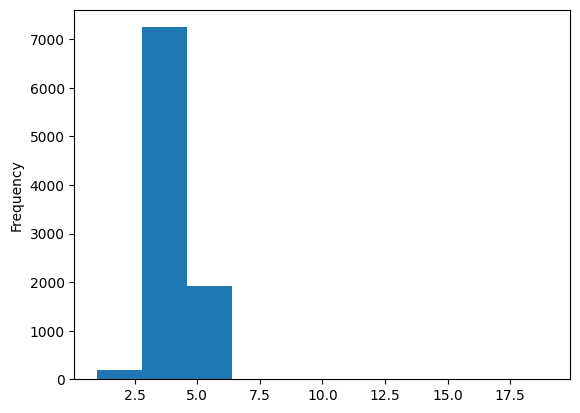

In [597]:
df["Rating"].plot(kind="hist")

Rating is supposed to be a float between 1 and 5 (inclusive).  
Check for invalid values in the `Rating` column and set them as `NaN`.  
Then, fill the null values in the `Rating` column using the mean of the column.  
Finally, drop any rows with null values in any other columns.

In [598]:
df["Rating"].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [599]:
df.loc[df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [600]:
import numpy as np
df.loc[df["Rating"]>5,"Rating"]= np.nan
df.loc[df["Rating"]==np.nan]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [601]:
df["Rating"].fillna(df["Rating"].mean(),inplace=True)
df.head(3)

C:\Users\dell\AppData\Local\Temp\ipykernel_19204\165712318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(df["Rating"].mean(),inplace=True)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [602]:
df.dropna(inplace=True)
df.head(3)
# Clean any other non-numerical values by just dropping the index.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Clean the Column `Size` and make it Numeric (it is currently of type `object`).

In [603]:

df["Size_Updated"] = pd.to_numeric(df["Size"],errors='coerce')
# change the Size values to numeric feild , values that are not fully numeric like "12M" which causes errors are updated with NA values then throwing parse error 


In [604]:
df.loc[df["Size_Updated"].isna()].head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN


In [605]:
df.loc[df["Size"].str.contains('M')].head(4)
#  all the the Size_col values that Contain M init 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN


In [606]:
df.loc[df["Size"].str.contains('M'),'Size'].str.replace('M','')

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10835    9.6
10836     53
10837    3.6
10838    9.5
10840     19
Name: Size, Length: 8823, dtype: object

In [607]:
pd.to_numeric(df.loc[df["Size"].str.contains('M'),'Size'].str.replace('M',''))*1e6

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10835     9600000.0
10836    53000000.0
10837     3600000.0
10838     9500000.0
10840    19000000.0
Name: Size, Length: 8823, dtype: float64

In [608]:
df["New_Size"]=(pd.to_numeric(df.loc[df["Size"].str.contains('M'),'Size'].str.replace('M',''))*1e6).astype('str')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19000000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8700000.0


### How many Duplicated Apps are there in the Dataset?

In [609]:
df.loc[df.duplicated(subset=["App"])].sort_values(by="App").head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,NaN,3800000.0
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,NaN,26000000.0
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,NaN,3800000.0
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,NaN,15000000.0
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,NaN,25000000.0


In [610]:
df.duplicated(keep=False).sum()
#  it check the whole row for duplication not just a single column

np.int64(893)

In [611]:
df.duplicated(subset=["App"],keep=False).sum()

#   by defaults it keeps the first occurence and marks the rest as duplicates , by setting keep = False it marks all the occurences as duplicates

np.int64(1979)

### Drop Duplicate apps kepping only the ones with greatest no. of reviews.

In [612]:
df__data_copy = df.copy()
#  excuted to create a copy of the dataframe to avoid any loss of data

In [613]:
df.loc[df.duplicated(subset=["App"],keep=False)].sort_values(by=["App","Reviews"]).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,NaN,3800000.0
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,NaN,3800000.0
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,NaN,26000000.0
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,NaN,26000000.0
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,NaN,3800000.0
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,NaN,3800000.0
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,NaN,15000000.0
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,NaN,15000000.0
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,NaN,25000000.0
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,NaN,25000000.0


In [614]:
df.sort_values(by=["Reviews","App"],ascending=False,inplace = True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,NaN,31000000.0
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,NaN,NaN
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,NaN,18000000.0
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,NaN,18000000.0
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,NaN,33000000.0


In [615]:
df.drop_duplicates(subset=["App"],keep="last",inplace=True)
df.head()

#  `Keep` is use to determine which element sholud consider the original one and which all as copies kepp=first-> take first element as original and delete all and vice versa with last 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,NaN,31000000.0
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,NaN,NaN
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,NaN,18000000.0
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,NaN,33000000.0
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,NaN,22000000.0


### Format the `Category` column 
Remove all the special characters and extra spaces from the `Category` column converting it to a proper `Title Case` format.
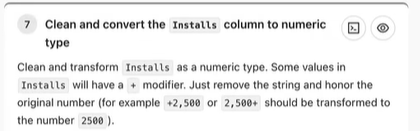

In [616]:
df["Category"].value_counts()

Category
FAMILY                 1862
GAME                    938
TOOLS                   826
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               113
FOOD_AND_DRINK          112
ENTERTAINMENT            93
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [617]:
df['Category']=df["Category"].str.replace('_',' ')
df['Category']=df['Category'].str.title()
df['Category'].value_counts()

Category
Family                 1862
Game                    938
Tools                   826
Business                419
Medical                 396
Personalization         374
Productivity            374
Lifestyle               369
Finance                 345
Sports                  327
Communication           316
Health And Fitness      287
Photography             281
News And Magazines      254
Social                  239
Books And Reference     221
Travel And Local        219
Shopping                202
Dating                  170
Video Players           163
Maps And Navigation     131
Education               113
Food And Drink          112
Entertainment            93
Auto And Vehicles        85
Libraries And Demo       83
Weather                  79
House And Home           74
Events                   64
Art And Design           63
Parenting                60
Comics                   56
Beauty                   53
Name: count, dtype: int64

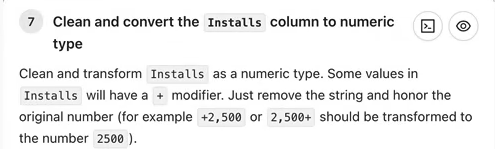

In [618]:
df["Installs"]

2989    1,000,000+
4970      100,000+
2723    1,000,000+
3079    1,000,000+
3229      500,000+
           ...    
7745           10+
5835           10+
9660           10+
7382          500+
2483            5+
Name: Installs, Length: 9648, dtype: object

In [619]:
df["Installs"] = df['Installs'].str.replace('+','')
#  df["Installs"] changes to numeric so this code will throw error

In [620]:
df["Installs"] = df['Installs'].str.replace(',','')

In [621]:
df['Installs']=pd.to_numeric(df['Installs'],errors='coerce')

In [622]:
df['Installs']

2989    1000000
4970     100000
2723    1000000
3079    1000000
3229     500000
         ...   
7745         10
5835         10
9660         10
7382        500
2483          5
Name: Installs, Length: 9648, dtype: int64

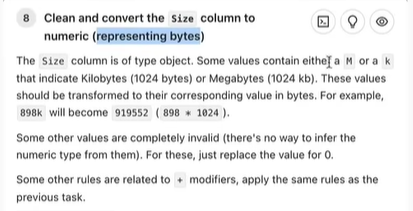

In [623]:
# df = df__data_copy
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
2989,GollerCepte Live Score,Sports,4.2,9992,31M,1000000,Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,NaN,31000000.0
4970,Ad Block REMOVER - NEED ROOT,Tools,3.3,999,91k,100000,Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,NaN,NaN
2723,SnipSnap Coupon App,Shopping,4.2,9975,18M,1000000,Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,NaN,18000000.0
3079,US Open Tennis Championships 2018,Sports,4.0,9971,33M,1000000,Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,NaN,33000000.0
3229,DreamTrips,Travel And Local,4.7,9971,22M,500000,Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,NaN,22000000.0


In [624]:
# pd.to_numeric(df["Size"].str.replace('M','').str.replace('k',''))

In [625]:
df["Size"].value_counts

<bound method IndexOpsMixin.value_counts of 2989     31M
4970     91k
2723     18M
3079     33M
3229     22M
        ... 
7745    3.7M
5835     42M
9660    6.3M
7382     31M
2483     29M
Name: Size, Length: 9648, dtype: object>

In [626]:
df.loc[df["Size"]=="Varies with device"].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
7002,Adult Color by Number Book - Paint Mandala Pages,Family,4.3,997,Varies with device,100000,Free,0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up,NaN,NaN
353,MegaFon Dashboard,Communication,3.7,99559,Varies with device,10000000,Free,0,Everyone,Communication,"July 30, 2018",Varies with device,Varies with device,NaN,NaN


In [627]:
##### Cannot set the direct value of Varies with device to 0 or NaN as it is non-numeric.So we can try replace the string
df["Size"] = df["Size"].str.replace('Varies with device','0')

In [628]:
pd.to_numeric(df["Size"].str.replace('M','').str.replace('k',''))

2989    31.0
4970    91.0
2723    18.0
3079    33.0
3229    22.0
        ... 
7745     3.7
5835    42.0
9660     6.3
7382    31.0
2483    29.0
Name: Size, Length: 9648, dtype: float64

In [629]:
df.loc[df["Size"].str.contains('k')].head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
4970,Ad Block REMOVER - NEED ROOT,Tools,3.3,999,91k,100000,Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,NaN,NaN
10282,FD Shift Calendar Widget,Tools,4.1,981,73k,100000,Free,0,Everyone,Tools,"March 16, 2011",1.2.4,1.6 and up,NaN,NaN
3517,File Explorer,Productivity,4.1,979,720k,100000,Free,0,Everyone,Productivity,"September 30, 2013",2.1.3,2.2 and up,NaN,NaN
6774,BT Messenger,Communication,3.9,97,598k,50000,Free,0,Everyone,Communication,"May 15, 2015",1.0,2.2 and up,NaN,NaN


In [630]:
df.loc[df["Size"].str.contains('k'),"Size"].str.replace('k','').head(4)

4970      91
10282     73
3517     720
6774     598
Name: Size, dtype: object

In [631]:
pd.to_numeric(df.loc[df["Size"].str.contains('k'),"Size"].str.replace('k','')).head(4)

4970      91.0
10282     73.0
3517     720.0
6774     598.0
Name: Size, dtype: float64

In [632]:
(pd.to_numeric(df.loc[df["Size"].str.contains('k'),"Size"].str.replace('k',''))*1024).head()

4970      93184.0
10282     74752.0
3517     737280.0
6774     612352.0
5561      95232.0
Name: Size, dtype: float64

In [633]:
df.loc[df["Size"].str.contains('k'),"Size"] =(pd.to_numeric(df.loc[df["Size"].str.contains('k'),"Size"].str.replace('k',''))*1024).astype(str)

In [634]:
df.loc[df["Size"].str.contains('M'),"Size"] =(pd.to_numeric(df.loc[df["Size"].str.contains('M'),"Size"].str.replace('M',''))*(1024*1024)).astype(str)

In [635]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
2989,GollerCepte Live Score,Sports,4.2,9992,32505856.0,1000000,Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,NaN,31000000.0
4970,Ad Block REMOVER - NEED ROOT,Tools,3.3,999,93184.0,100000,Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,NaN,NaN
2723,SnipSnap Coupon App,Shopping,4.2,9975,18874368.0,1000000,Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,NaN,18000000.0
3079,US Open Tennis Championships 2018,Sports,4.0,9971,34603008.0,1000000,Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,NaN,33000000.0
3229,DreamTrips,Travel And Local,4.7,9971,23068672.0,500000,Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,NaN,22000000.0


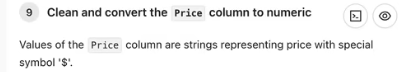

In [636]:
df["Price"].value_counts

<bound method IndexOpsMixin.value_counts of 2989        0
4970        0
2723        0
3079        0
3229        0
        ...  
7745    $1.49
5835        0
9660        0
7382        0
2483        0
Name: Price, Length: 9648, dtype: object>

In [676]:
df.loc[df["Price"].str.contains('$'),"Price"].str.replace('$','')

2989       0
4970       0
2723       0
3079       0
3229       0
        ... 
7745    1.49
5835       0
9660       0
7382       0
2483       0
Name: Price, Length: 9648, dtype: object

In [677]:
df.loc[df["Price"].str.contains('$'),"Price"] = pd.to_numeric(df.loc[df["Price"].str.contains('$'),"Price"].str.replace('$',''))

# Analysis 

In [678]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
2989,GollerCepte Live Score,Sports,4.2,9992,32505856.0,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,NaN,31000000.0
4970,Ad Block REMOVER - NEED ROOT,Tools,3.3,999,93184.0,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,NaN,NaN
2723,SnipSnap Coupon App,Shopping,4.2,9975,18874368.0,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,NaN,18000000.0
3079,US Open Tennis Championships 2018,Sports,4.0,9971,34603008.0,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,NaN,33000000.0
3229,DreamTrips,Travel And Local,4.7,9971,23068672.0,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,NaN,22000000.0


Which compnay has the most review ?

In [640]:
df.sort_values(by="Reviews",ascending=False).head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
2989,GollerCepte Live Score,Sports,4.2,9992,32505856.0,1000000,Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,NaN,31000000.0
4970,Ad Block REMOVER - NEED ROOT,Tools,3.3,999,93184.0,100000,Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,NaN,NaN


In [ ]:
df["Reviews"].max()

'9992'

which catagory is with the most uploaded apps ?

In [647]:
df["Category"].describe().top

'Family'

Catagory with Most expensive app?

In [653]:
df.sort_values(by="Price",ascending=False).head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
2989,GollerCepte Live Score,Sports,4.200000,9992,32505856.0,1000000,Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,NaN,31000000.0
9118,DEM DZ,Health And Fitness,4.191757,2,979968.0,100,Free,0,Teen,Health & Fitness,"November 13, 2017",1.0,2.3.3 and up,NaN,NaN


In [679]:
df.loc[df["Price"]==df["Price"].max(),["Price","Category","App"]].head(2)

,Price,Category,App
4367,400.0,Lifestyle,I'm Rich - Trump Edition


Most Rated Game app ? 

In [680]:
df[df["Category"]=="Game"].sort_values(by="Rating",ascending=False).head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
10776,Monster Ride Pro,Game,5.0,1,25165824.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,NaN,24000000.0
10697,Mu.F.O.,Game,5.0,2,16777216.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,NaN,16000000.0


In [681]:
df[df["Category"]=="Finance"].sort_values(by="Reviews",ascending=False).head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
6049,be Produbanco,Finance,4.0,967,23068672.0,100000,Free,0.0,Everyone,Finance,"August 2, 2018",1.2.1,4.1 and up,NaN,22000000.0
1166,USE Credit Union Mobile,Finance,4.6,964,14680064.0,10000,Free,0.0,Everyone,Finance,"June 12, 2018",5.9.1.0,5.0 and up,NaN,14000000.0


In [682]:
df[df["Category"]=="Health And Fitness"].sort_values(by="Installs",ascending=False).head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
5596,Samsung Health,Health And Fitness,4.3,480208,73400320.0,500000000,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up,NaN,70000000.0
1360,Period Tracker - Period Calendar Ovulation Tra...,Health And Fitness,4.8,4559407,0,100000000,Free,0.0,Everyone,Health & Fitness,"August 1, 2018",Varies with device,Varies with device,NaN,NaN


Paid game with mostreviews ?

In [686]:
df[df["Price"] != 0].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
6911,Beautiful Widgets Pro,Personalization,4.2,97890,14680064.0,1000000,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,NaN,14000000.0
2170,Hactar Go,Family,4.8,97,3670016.0,1000,Paid,2.99,Everyone,Board;Brain Games,"March 30, 2018",2.4.15,4.0 and up,NaN,3500000.0
10035,Deus Ex GO,Family,4.5,9699,24117248.0,100000,Paid,0.99,Teen,Puzzle,"July 23, 2018",2.1.111374,4.2 and up,NaN,23000000.0
8723,DRAGON QUEST,Family,4.2,9659,31457280.0,100000,Paid,2.99,Everyone,Role Playing,"March 10, 2017",1.0.7,2.3 and up,NaN,30000000.0
4606,I Can't Wake Up!,Tools,4.7,963,3879731.2,10000,Paid,2.99,Everyone,Tools,"May 25, 2018",3.4.0,4.0 and up,NaN,3700000.0


Most expensive app with highest rating ?

In [691]:
df.sort_values(by=["Price","Rating"],ascending=[False,False]).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
4367,I'm Rich - Trump Edition,Lifestyle,3.600000,275,7654604.8,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,NaN,7300000.0
5362,I Am Rich Pro,Family,4.400000,201,2831155.2,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,NaN,2700000.0
4197,most expensive app (H),Family,4.300000,6,1572864.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,NaN,1500000.0
5369,I am Rich,Finance,4.300000,180,3984588.8,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up,NaN,3800000.0
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,Lifestyle,4.191757,0,41943040.0,0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,NaN,40000000.0


Paid game with most reviews ?

In [692]:
df.loc[df["Type"]=="Paid"].sort_values(by="Reviews",ascending=False).head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Updated,New_Size
6911,Beautiful Widgets Pro,Personalization,4.2,97890,14680064.0,1000000,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,NaN,14000000.0
2170,Hactar Go,Family,4.8,97,3670016.0,1000,Paid,2.99,Everyone,Board;Brain Games,"March 30, 2018",2.4.15,4.0 and up,NaN,3500000.0
10035,Deus Ex GO,Family,4.5,9699,24117248.0,100000,Paid,0.99,Teen,Puzzle,"July 23, 2018",2.1.111374,4.2 and up,NaN,23000000.0
8723,DRAGON QUEST,Family,4.2,9659,31457280.0,100000,Paid,2.99,Everyone,Role Playing,"March 10, 2017",1.0.7,2.3 and up,NaN,30000000.0
